In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
data = pd.read_csv('D:/PRML assignment 2/Assignment-2/Dataset/A2Q1Data.csv',header=None)

In [3]:
data=np.array(data)

In [4]:
data=data.reshape(1000)

In [5]:
data=data.tolist()

In [6]:
iterations=100

In [7]:
n=len(data)
n

1000

In [8]:
k=4

In [9]:
def generate_randoms():
    r=[random.random() for i in range(0,4)]
    s=sum(r)
    r=[i/s for i in r]
    return r

In [10]:
log_likelihood=[]
for i in range (20):
    log_likelihood.append(0)
e1=0.00001

In [11]:
iterations=100

In [13]:
def update_loglikelihood(temp,cluster_prob,miu,sigma,data):
    for j in range(n):
        temp1=0
        d=data[j]
        for z in range(k):
            c=cluster_prob[z]
            s=sigma[z]
            a=miu[z]
            temp11=np.sqrt(2*np.pi*s+e1)
            exponent=((d-a)**2)/(2*s+e1)
            temp1+=c*(1/temp11+e1)*np.exp(-exponent)
        temp+=np.log(temp1)
    return temp

In [15]:
for p in range (iterations):
    miu=[]
    sigma=[]
    for v in range(4):
        temp=random.uniform(0,1)
        miu.append(temp)
    for v in range(4):
        temp=random.uniform(0,1)
        sigma.append(temp)
    cluster_probability=generate_randoms()
    lambdas=np.zeros((n,k))
    for i in range (20):
        for j in range(n):
            d=data[j]
            for z in range(k):
                c=cluster_prob[z]
                s=sigma[z]
                a=miu[z]
                temp11=np.sqrt(2*np.pi*s+e1)
                lambdas[j][z]=c*(1/temp11+e1)*np.exp(-((d-a)**2)/(2*s+e1))
            lambdas[j]=lambdas[j]/np.sum(lambdas,axis=1)[j]
        temp=0
        log_likelihood[i]+=update_loglikelihood(temp,cluster_probability,miu,sigma,data)
        for j in range(4):
        temp21=0
        temp22=0
        for z in range(1000):
            d=data[z]
            l=lambdas[z][j]
            temp21+=d*l
            temp22+=l
        if(temp22==0):
            temp22=0.00001
        miu[j]=temp21/temp22
        cluster_probability[j]=temp22/n
    for j in range(4):
        temp23=0
        temp24=0
        for z in range(1000):
            d=data[z]
            l=lambdas[z][j]
            a=miu[j]
            temp23+=l*((d-a)**2)
            temp24+=l
        if(temp24==0):
            temp24=0.00001
        sigma[j]=temp23/temp24

In [16]:
def final(XX,log_likelihood,iter):
    for i in range(iter):
        log_likelihood[i]=log_likelihood[i]/100
        XX[i]=i
        XX=XX.tolist()
    return XX,log_likelihood


In [18]:
XX=np.zeros(20)

In [19]:
XX,YY=final(XX,log_likelihood,20)

In [20]:
def plotting(XX,objective):
    plt.figure(figsize=(10,8))
    plt.plot(XX,objective)
    plt.ylabel('Log_likelihood')
    plt.xlabel('range of iterations')
    plt.suptitle('The plotting')
    plt.show()

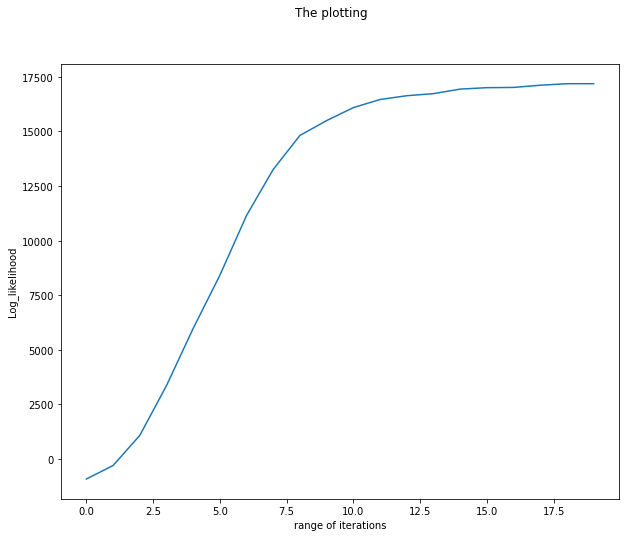

In [21]:
plotting(XX,YY)